# Laboratorio 3
Alina Carías, Daniel Machic, Ariela Mishaan

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Task 1

### **Ejercicio 1:** Calcular eigenvalores para las matrices. 


La matriz del segundo momento es:

$$
M =
\begin{bmatrix}
120 & 5 \\
5 & 115
\end{bmatrix}
$$

Y la segunda matriz es:

$$
M' =
\begin{bmatrix}
200 & 10 \\
10 & 1
\end{bmatrix}
$$



#### 1. Polinomios característicos



$$
M -\lambda I=
\begin{bmatrix}
120 -\lambda & 5 \\
5 & 115 - \lambda
\end{bmatrix}
$$ 

$$\to P(\lambda) = det(M -\lambda I) = (120-\lambda)(115-\lambda) - 25$$

$$M' - \lambda I =
\begin{bmatrix}
200-\lambda & 10 \\
10 & 1-\lambda
\end{bmatrix}
$$

$$\to P'(\lambda) = det(M' - \lambda I) = (200 - \lambda)(1-\lambda)-100 $$


#### 2. Calcular Eigenvalores (Soluciones del polinomio cracterístico)

**Para M:**
$$(120-\lambda)(115-\lambda) -25 = 0$$
$$\lambda^2 - 235\lambda + 13775 = 0$$

$$
\begin{aligned}
\lambda_1 &\approx 122.07 \\
\lambda_2 &\approx 112.93
\end{aligned}
$$


**Para M':**
$$(200-\lambda)(1-\lambda) -100 = 0$$
$$200 - 200\lambda - \lambda + \lambda^2 - 100 = 0$$
$$\lambda^2 - 201\lambda + 100 = 0$$

$$
\begin{aligned}
\lambda_1 &\approx 200.50 \\
\lambda_2 &\approx 0.50
\end{aligned}
$$

#### 3. Comprobación con Python

In [26]:
M = np.array([[120, 5],
              [5,  115]])
M_barra = np.array([[200, 10],
              [10,  1]])

eigenvaluesM, eigenvectorsM = np.linalg.eig(M)
eigenvaluesM_barra, eigenvectorsM_barra = np.linalg.eig(M_barra)

print("Eigenvalores de M: ", eigenvaluesM)
print("Eigenvalores de M': ", eigenvaluesM_barra)


Eigenvalores de M:  [123.09016994 111.90983006]
Eigenvalores de M':  [200.50124999   0.49875001]


### **Ejercicio 2:** Calcular Respuesta de Harris (R) con k = 0.04

La respuesta de Harris se define como:

$$
R = \det(M) - k \cdot (\text{trace}(M))^2
$$

donde $k = 0.04$

#### Matriz M

- Determinante: 
  
  $$det(M) = 120 \cdot 115 - 25 = 13 775$$

- Traza:
  
  $$trace(M) = 120 + 115 = 235$$

- Respuesta de Harris: 
  
  $$R = 13775 - 0.04\cdot (235)^2 = \mathbf{11566}$$

#### Matriz M'

- Determinante: 
  
  $$det(M') = 200 \cdot 1 - 100 = 100$$

- Traza:
  
  $$trace(M') = 200 +1 = 201$$

- Respuesta de Harris: 
  
  $$R = 100 - 0.04\cdot (201)^2 = \mathbf{-1516.04}$$

### **Ejercicio 3:** Interpretación

Con los datos calculados se puede determinar la representación de pixeles de dos maneras distintas: con la respuesta de Harris y con los eigenvalores. 

**1. Respuesta de Harris:** 
- $R >> 0$: Esquina
- $R <0$: Borde
- $R \approx 0$: Región plana

**2. Eigenvalores**
- $\lambda_1, \lambda_2 >> 0$: Esquina
- $\lambda_1 >> \lambda_2$ o viceversa: Borde
- $\lambda_1, \lambda_2 \approx 0$: Región plana

Para las matrices analizadas: 

- **Matriz M**: El valor de **R** es mucho mayor a 0, también los dos eigenvalores son positivos. Esto indica que M representa un pixel en una **esquina**. 
  
- **Matriz M'**: El valor d e **R** es negativo; el primer eigenvalor es mucho mayor al segundo. Esto indica que M' representa un pixel en un **borde**. 

## Task 2

### Cargar imágenes

In [27]:
img1_path = "foto1.jpeg"  # Vista frontal
img2_path = "foto2.jpeg"  # Vista rotada y con cambio de escala

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

#cambiar a escala de grises
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print(f"  Imagen 1: {gray1.shape}")
print(f"  Imagen 2: {gray2.shape}")

  Imagen 1: (1280, 960)
  Imagen 2: (1600, 1200)


### Implementación de detección y descripción con SIFT

In [28]:
print("\n" + "="*60)
print("PARTE 1: SIFT")
print("="*60)

# Crear el detector SIFT
sift = cv2.SIFT_create()

kp1_sift, des1_sift = sift.detectAndCompute(gray1, None)
kp2_sift, des2_sift = sift.detectAndCompute(gray2, None)

print(f"Keypoints detectados en imagen 1: {len(kp1_sift)}")
print(f"Keypoints detectados en imagen 2: {len(kp2_sift)}")


PARTE 1: SIFT
Keypoints detectados en imagen 1: 3014
Keypoints detectados en imagen 2: 10740


### Implementación de detección y descripción con ORB

In [29]:
print("\n" + "="*60)
print("PARTE 2: ORB")
print("="*60)

# Crear el detector ORB 
orb = cv2.ORB_create(nfeatures=2000)

kp1_orb, des1_orb = orb.detectAndCompute(gray1, None)
kp2_orb, des2_orb = orb.detectAndCompute(gray2, None)

print(f"Keypoints detectados en imagen 1: {len(kp1_orb)}")
print(f"Keypoints detectados en imagen 2: {len(kp2_orb)}")


PARTE 2: ORB
Keypoints detectados en imagen 1: 2000
Keypoints detectados en imagen 2: 2000


### Matching

#### SIFT (L2 Euclidiana)

In [30]:
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# Encontrar los 2 mejores matches
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

print(f"Total de matches encontrados: {len(matches_sift)}")

Total de matches encontrados: 3014


#### ORB (Hamming)

In [31]:
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# Encontrar los 2 mejores matches
matches_orb = bf_orb.knnMatch(des1_orb, des2_orb, k=2)

print(f"Total de matches encontrados: {len(matches_orb)}")

Total de matches encontrados: 2000


### Implementación de Lowe's Ratio Test

#### SIFT

In [32]:
good_matches_sift = []

for match_pair in matches_sift:
    # Verificar metches
    if len(match_pair) == 2:
        m, n = match_pair  
        if m.distance < 0.75 * n.distance:
            good_matches_sift.append(m)

print(f"Buenos matches después del filtro: {len(good_matches_sift)}")
print(f"Porcentaje de inliers: {len(good_matches_sift)/len(matches_sift)*100:.2f}%")

Buenos matches después del filtro: 348
Porcentaje de inliers: 11.55%


#### ORB

In [33]:
good_matches_orb = []

for match_pair in matches_orb:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < 0.75 * n.distance:
            good_matches_orb.append(m)

print(f"Buenos matches después del filtro: {len(good_matches_orb)}")
print(f"Porcentaje de inliers: {len(good_matches_orb)/len(matches_orb)*100:.2f}%")

Buenos matches después del filtro: 19
Porcentaje de inliers: 0.95%


### Generar imagen

#### SIFT

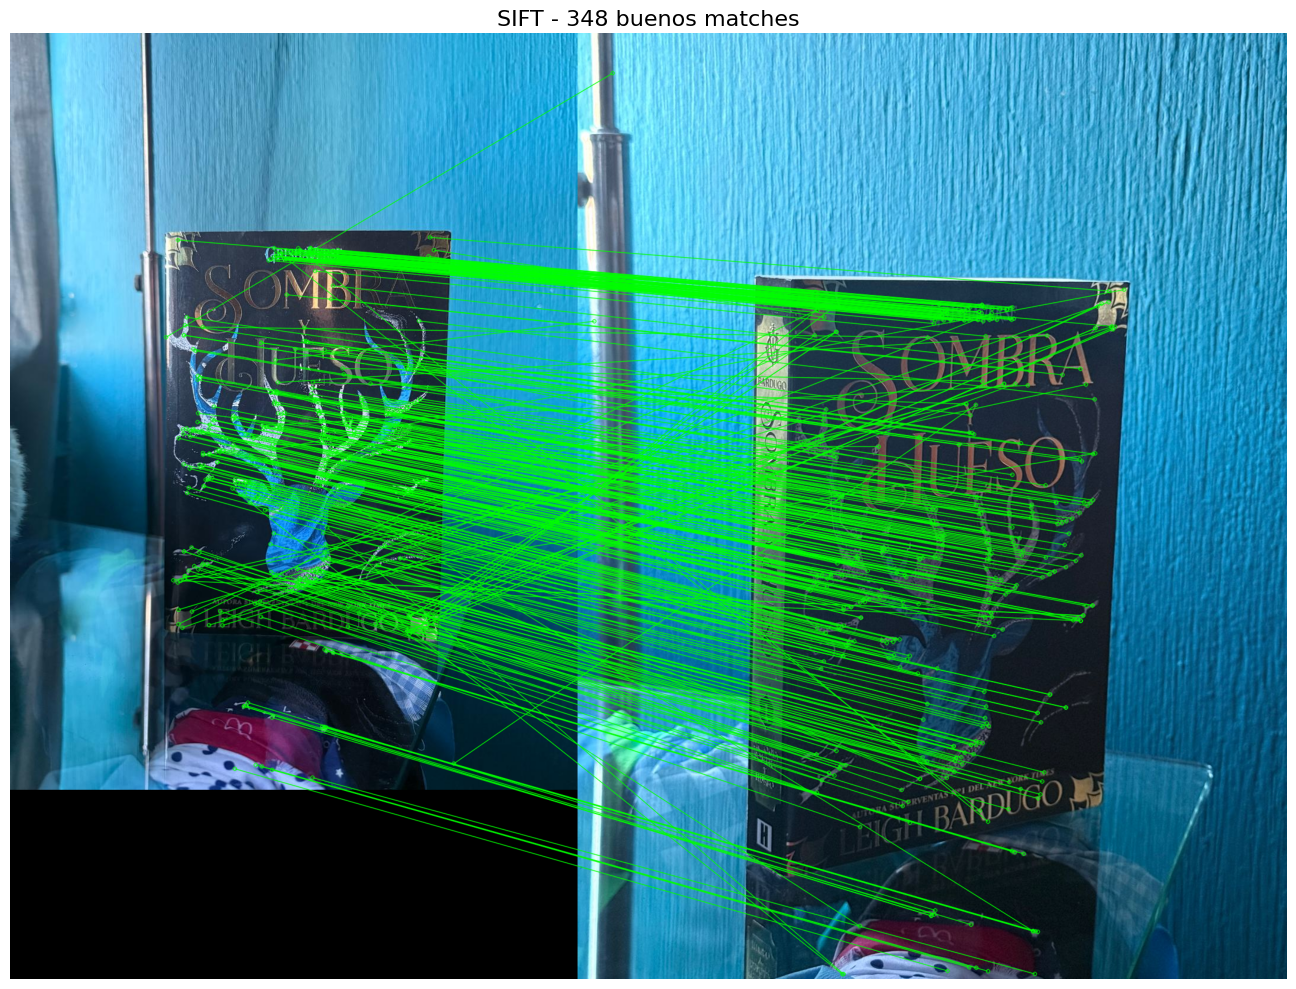

guardado como 'resultado_sift.jpg'


In [34]:
img_matches_sift = cv2.drawMatches(
    img1, kp1_sift,     
    img2, kp2_sift,     
    good_matches_sift,  
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0),      # Verde para las líneas
    singlePointColor=(255, 0, 0) # Rojo para los puntos
)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT - {len(good_matches_sift)} buenos matches', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Guardar imagen
cv2.imwrite("resultado_sift.jpg", img_matches_sift)
print("guardado como 'resultado_sift.jpg'")

#### ORB

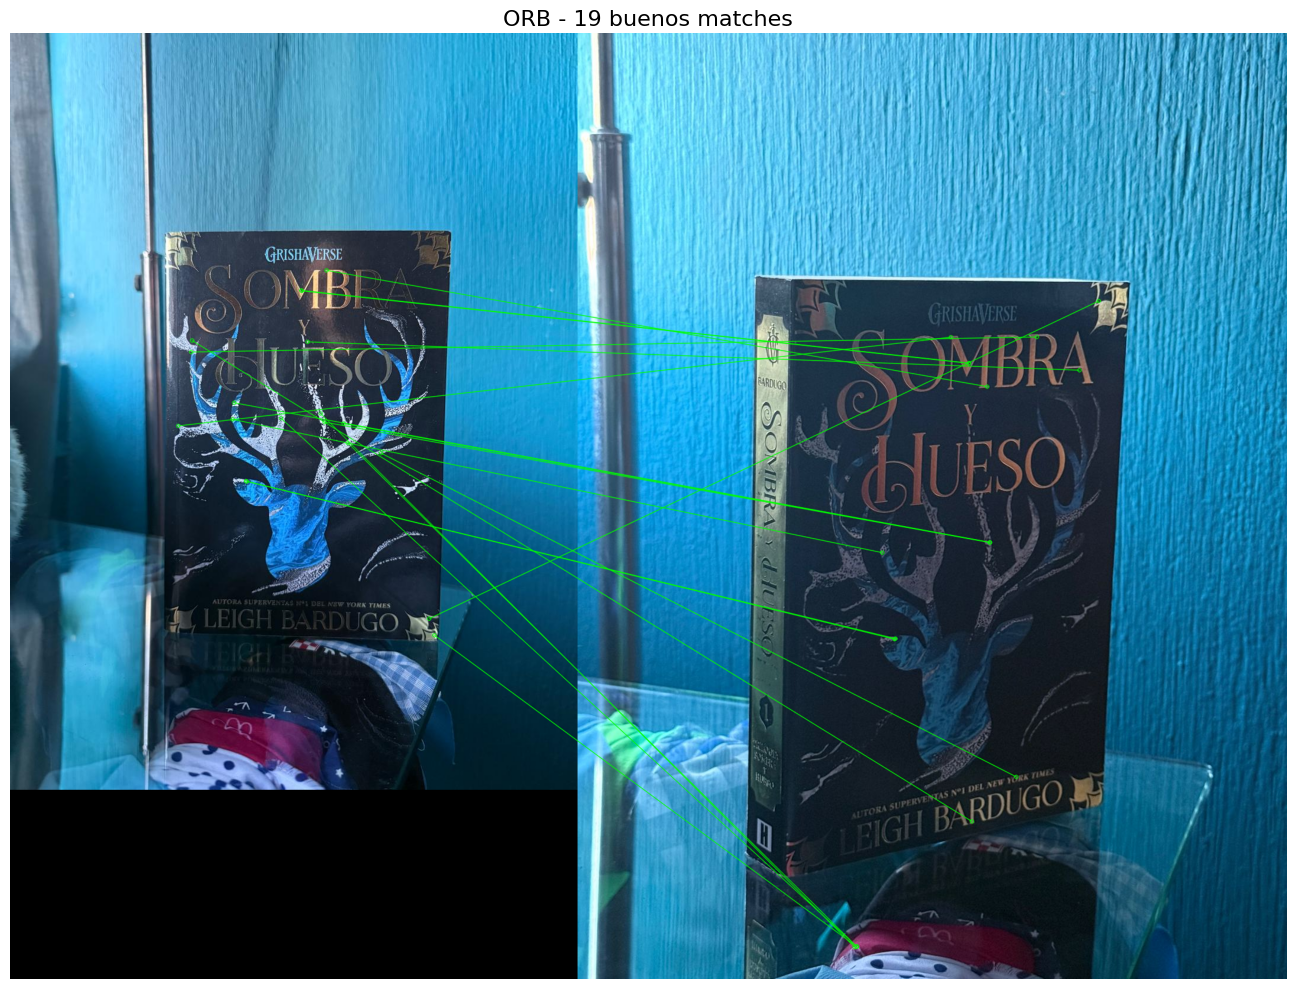

guardado como 'resultado_orb.jpg'


In [35]:
img_matches_orb = cv2.drawMatches(
    img1, kp1_orb,
    img2, kp2_orb,
    good_matches_orb,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0)
)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
plt.title(f'ORB - {len(good_matches_orb)} buenos matches', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Guardar imagen
cv2.imwrite("resultado_orb.jpg", img_matches_orb)
print("guardado como 'resultado_orb.jpg'")

## Task 3

In [36]:
import cv2
import numpy as np
import time
import pandas as pd

### Metodología de medición de desempeño

In [37]:
def measure_algorithm(detector, matcher, img1, img2, runs=10):
    detect_times = []
    match_times = []
    kp1_counts = []
    kp2_counts = []
    good_matches_counts = []

    for _ in range(runs):
        # --- Detección + descripción ---
        start = time.perf_counter()
        kp1, des1 = detector.detectAndCompute(img1, None)
        kp2, des2 = detector.detectAndCompute(img2, None)
        end = time.perf_counter()

        detect_times.append((end - start) * 1000)
        kp1_counts.append(len(kp1))
        kp2_counts.append(len(kp2))

        # --- Matching ---
        start = time.perf_counter()
        matches = matcher.knnMatch(des1, des2, k=2)

        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        end = time.perf_counter()

        match_times.append((end - start) * 1000)
        good_matches_counts.append(len(good_matches))

    return {
        "detect_time_ms": np.mean(detect_times),
        "match_time_ms": np.mean(match_times),
        "total_time_ms": np.mean(detect_times) + np.mean(match_times),
        "kp1": int(np.mean(kp1_counts)),
        "kp2": int(np.mean(kp2_counts)),
        "good_matches": int(np.mean(good_matches_counts))
    }

### Comparación SIFT vs ORB

#### SIFT

In [40]:
sift = cv2.SIFT_create()
bf_sift = cv2.BFMatcher(cv2.NORM_L2)

sift_results = measure_algorithm(
    sift,
    bf_sift,
    gray1,
    gray2,
    runs=10
)

sift_results

{'detect_time_ms': np.float64(235.59954570027912),
 'match_time_ms': np.float64(47.1405041998878),
 'total_time_ms': np.float64(282.7400499001669),
 'kp1': 3014,
 'kp2': 10740,
 'good_matches': 348}

SIFT presentó un alto costo computacional, con un tiempo total promedio cercano a los 280 ms. Sin embargo, produjo una gran cantidad de keypoints y correspondencias válidas, lo que evidencia su robustez frente a cambios de escala y rotación.

#### ORB

In [41]:
orb = cv2.ORB_create(nfeatures=1000)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING)

orb_results = measure_algorithm(
    orb,
    bf_orb,
    gray1,
    gray2,
    runs=10
)

orb_results

{'detect_time_ms': np.float64(29.473279200283287),
 'match_time_ms': np.float64(1.253879300020344),
 'total_time_ms': np.float64(30.72715850030363),
 'kp1': 1000,
 'kp2': 1000,
 'good_matches': 4}

El algoritmo ORB presentó un desempeño significativamente más rápido que SIFT, con un tiempo total promedio cercano a los 31 ms. Este comportamiento se debe a su diseño orientado a aplicaciones en tiempo real, utilizando descriptores binarios y operaciones de comparación basadas en distancia de Hamming. Sin embargo, a pesar de su eficiencia computacional, ORB produjo un número muy reducido de correspondencias válidas bajo los cambios de escala y rotación evaluados, lo que evidencia una menor robustez frente a transformaciones geométricas complejas. Este resultado refleja claramente el trade-off entre velocidad y precisión característico de ORB.

### Tabla de Comparación

In [42]:
df = pd.DataFrame([
    ["SIFT", 282.74, "3014 / 10740", 348],
    ["ORB", 30.73, "1000 / 1000", 4]
], columns=[
    "Algoritmo",
    "Tiempo total (ms)",
    "Keypoints (Img A / Img B)",
    "Good Matches"
])

df

Algoritmo  Tiempo total (ms) Keypoints (Img A / Img B)  Good Matches
0      SIFT             282.74              3014 / 10740           348
1       ORB              30.73               1000 / 1000             4

### Análisis

#### Producto A – Drone de Carreras (60 FPS)


**Restricción:**
- 60 FPS ≈ 16 ms
- Imagen Borrosa
- Tiempo Real

**Conclusión:**

Para el Producto A, que requiere operar a una tasa mínima de 60 FPS, el algoritmo ORB resulta más adecuado debido a su menor costo computacional. Aunque no alcanza estrictamente el presupuesto de 16 ms en esta configuración, su desempeño es significativamente superior al de SIFT y puede optimizarse adicionalmente para cumplir los requisitos de tiempo real.

Aunque ORB no alcanza estrictamente el presupuesto de 16 ms en esta configuración, su tiempo total es un orden de magnitud menor que el de SIFT. Con ajustes adicionales como reducción de resolución, menor número de keypoints o implementación en hardware dedicado, ORB resulta claramente más viable para aplicaciones de odometría visual en tiempo real.

#### Producto B – Drone de Inspección

**Restricción:**
- Precisión milimétrica
- Alta resolución
- Tiempo NO crítico

**Conclusión:**

Para el Producto B, donde la precisión del emparejamiento es prioritaria y el tiempo de procesamiento no es crítico, se selecciona SIFT. Su mayor número de correspondencias válidas y su robustez frente a transformaciones geométricas lo hacen más adecuado para aplicaciones de inspección estructural de alta precisión.

SIFT demostró una clara superioridad en la calidad del emparejamiento, produciendo un número significativamente mayor de correspondencias válidas bajo cambios de escala y rotación. En escenarios de inspección estructural, donde la precisión es prioritaria y el tiempo de procesamiento no es crítico, SIFT es la opción más adecuada.

#### Análisis General
Las conclusiones obtenidas dependen del conjunto de imágenes evaluado y de los parámetros utilizados. Factores como iluminación, nivel de desenfoque y textura pueden afectar el desempeño relativo de ambos algoritmos. Para una evaluación más general, sería necesario analizar múltiples escenas y métricas adicionales como tasa de outliers o estabilidad temporal.